# Исследование опыта известных платформ и игр.

1. [**Подготовка данных к анализу.**](#100101)
    * [1.1.Годы в которые было выпущено самое большое количество игр.](#100102)
    * [1.2.Самые популярные платформы для игр.](#100103)
    * [1.3.Самые популярные жанры.](#100104)
    * [1.4.Какова маркировка самых популярных игр?](#100105)
    * [1.5.Оценка критиков.](#100106) 
***********
2. [**Исследование данных.**](#102100)
    * [2.1.Графики произведенных игр и общих продаж по каждому году.](#102101)
    * [2.2.График общих продаж по каждому жанру.](#102102)
    * [2.3.График общих продаж по каждой платформе.](#102103)
    * [2.4.Графики количества выпущенных игр с отзывами и без.](#102104)
    * [2.5.Boxplot по глобальным продажам.](#102105)
    * [2.6.Медианная цена игр по годам.](#102106)
    * [2.7.Медианная цена игр по годам с группировкой по жанрам.](#102107)
    * [2.8.Характеристики данных по компании выпускающей ту или иную платформу.](#102108)
    * [2.9.На какой платформе было выпущено больше всего игр.](#102109)
    * [2.10.Игры какого жанра пользуются наибольшей популярностью.](#102110)
    * [2.11.Трансформация популярности того или иного жанра, в зависимости от времени.](#102111)
    * [2.12.Игры с максимальной оценкой от пользователей.](#102112)
    * [2.13.Игры с максимальной оценкой от критиков.](#102113)
    * [2.14.Игры с минимальной оценкой от пользователей.](#102114)
    * [2.15.Игры с минимальной оценкой от критиков.](#102115)
    * [2.16.Есть ли корреляция между оценками пользователей и критиков.](#102116)
************* 
3. [**Портрет пользователя для каждого региона.**](#10103)
    * [3.1.ТОП-5 жанров для каждого региона.](#103100)
    * [3.2.В какие годы больше всего покупали игры (по регионам)?](#103101)
    * [3.3.ТОП-5 платформ по регионам.](#103102)
    * [3.4.Игры с каким рейтингом чаще всего встречаются?](#103103)
****************
4. [**Проверка гипотез.**](#10104)
    * [4.1.Одинаков ли средний пользовательский рейтинг платформ PS2 и PS3?](#104100)
    * [4.2.Различаются ли средний пользовательский рейтинг жанров Action и Sports?](#104101)
*************
5. [**Общие выводы.**](#10105)

### 1. Подготовка данных к анализу <a id='100101'></a>

In [84]:
import pandas as pd
games=pd.read_csv('games.csv')
rating=pd.read_csv('rating.csv')
games = games.set_index('Unnamed: 0')
games.index.name = None

from pandas.plotting import register_matplotlib_converters
import plotly.express as px
from plotly import graph_objects as go

from nltk.stem import SnowballStemmer
from pymystem3 import Mystem
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 100
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None
import math
import numpy as np

from scipy import stats as st 

In [85]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [86]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [87]:
rating.head(10)

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [88]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


* *переименуем столбцы, для удобства:*

In [89]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_players', 'eu_players', 'ru_players', 'other_players', 'critic_score', 'user_score', 'rating']
#games.head()

In [90]:
rating.columns = ['rating', 'description']
#rating.head()

* *Удалим строки с пропусками важных значений в колонке name, их всего 2, на результаты это не повлияет.*

In [91]:
games.dropna(subset = ['name'], inplace = True)
#games.info()

Строки с пустыми значениями пропали и в колонке genre. Осталось 16717 строк. Для исследования нам понадобятся строки с годом выхода игры, среди них незаполнено 1,6% от общего количества, так что можем их убрать.

In [92]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games = games.query('year_of_release != 0')
#games.info()

* *Заменим тип у столбца с годом выпуска на целочисленный.*

In [93]:
games['year_of_release'] = games['year_of_release'].astype(int)

* *Посмотрим на уникальные значения колонки с годом выпуска игр, и их количество.*

In [94]:
games['year_of_release'].value_counts(normalize=True).head(10)
#games['year_of_release'].unique()

2008    0.086758
2009    0.086697
2010    0.076301
2007    0.072775
2011    0.069066
2006    0.061162
2005    0.057089
2002    0.050401
2003    0.047118
2004    0.046328
Name: year_of_release, dtype: float64

<font color='green'>**1.1.Самое большое количество игр было выпущено с 2006 по 2011 годы.**</font> <a id='100102'></a>

* *Посмотрим на уникальные значения колонки с названиями игровых платформ, и их количество.*

In [95]:
games['platform'].value_counts(normalize=True)
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<font color='green'>**1.2.Самые популярные платформы для игр: PS2 и DS.**</font> <a id='100103'></a>

* *Посмотрим на уникальные значения колонки с жанрами игр, и их долю.*

In [96]:
games['genre'].value_counts(normalize=True)
#games['genre'].unique()

Action          0.201119
Sports          0.140199
Misc            0.104633
Role-Playing    0.090163
Shooter         0.078794
Adventure       0.078611
Racing          0.074538
Platform        0.053380
Simulation      0.052164
Fighting        0.050888
Strategy        0.040917
Puzzle          0.034594
Name: genre, dtype: float64

<font color='green'>**1.3.Самые популярные жанры: Action, Sports, Misc и Role-Playing.**</font> <a id='100104'></a>

* *Посмотрим на уникальные значения колонки с рейтингом, и его распределение.*

In [97]:
games['rating'].value_counts(normalize=True)
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<font color='green'>**1.4.Больше всего популярны игры с маркировкой для всех и с 10 до 19 лет. Есть пропущенные!**</font> <a id='100105'></a>

* *Посмотрим на уникальные значения колонки с оценками критиков, и их количество.*

In [98]:
games['critic_score'].value_counts(normalize=True)
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

<font color='green'>**1.5.Больше всего игр без оценок критиков - 51,4%**</font> <a id='100106'></a>

* *Заменим Nan на 0, чтобы не удалять всю информацию и потом заменим тип колонки на целочисленный.*

In [99]:
games['critic_score'] = games['critic_score'].fillna(0).astype(int)
#games.info()

* *Посмотрим на уникальные значения колонки с оценками пользователей, и их количество.*

In [100]:
games['user_score'].value_counts(normalize=True)
games['user_score'].unique()
#games_tbd = games.query('user_score == "tbd"')
#games_tbd

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

24% строк занимает оценка tbd - скорее всего значит, что оценка вскоре будет добавлена, но анализ нам нужен сейчас, а пока заменим на специальную оценку -1 и NaN тоже, чтобы не терять данные и заменим тип колонки на float для облегчения расчетов.

In [101]:
games['user_score'] = games['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

games['user_score'] = games['user_score'].astype(float)
games['user_score'].value_counts(normalize=True).head(10)

-1.0    0.546267
 7.8    0.019577
 8.0    0.017327
 8.2    0.016780
 8.3    0.015321
 7.5    0.015139
 8.5    0.015017
 7.9    0.014956
 8.1    0.014409
 7.7    0.014348
Name: user_score, dtype: float64

Здесь так же больше всего игр без оценок пользователей - 54,6%

* *Посмотрим есть ли дубликаты игра + платформа, если есть удалим:*

In [102]:
#dupl = games[games.duplicated(['name', 'platform'])]
#dupl
games = games.drop_duplicates(['name', 'platform'])

#games.info()

* *Присоединим расшифровку рейтинга к общей таблице.*

In [103]:
game = pd.merge(games, rating, on=['rating'], how='outer')
#game

* *Сделаем столбец с общими продажами каждого продукта:*

In [104]:
game['total_value'] = game['na_players'] + game['eu_players'] + game['ru_players'] + game['other_players']
#game

Наблюдается взаимосвязь данных об отзывах. Как правило если есть данные об отзывах критиков, то есть и отзывы от пользователей.

### 2. Исследование данных: <a id='102100'></a>

### 2.1.Графики произведенных игр и общих продаж по каждому году: <a id='102101'></a>

* произведенные игры

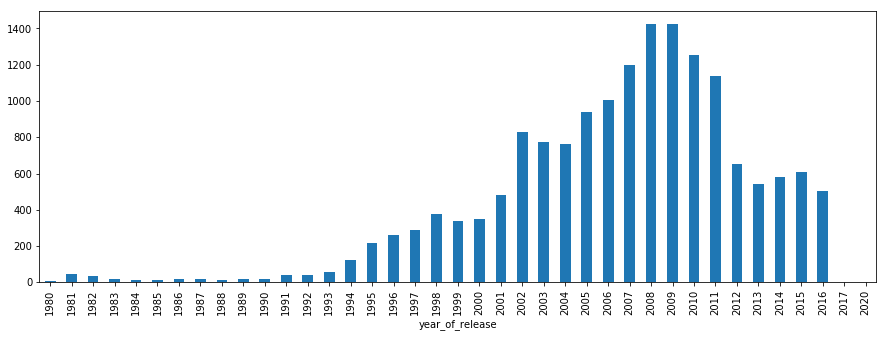

In [105]:
game_year = game.groupby(['year_of_release'])['name'].count()
game_year.plot(y='year_of_release', kind='bar', figsize=(15, 5))

* общие продажи

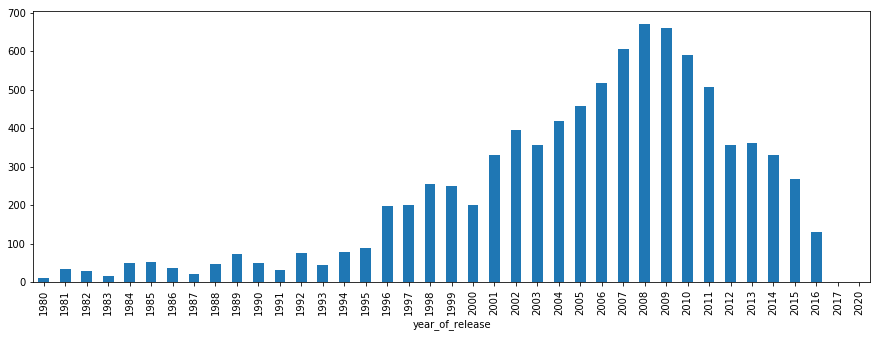

In [106]:
value_year = game.groupby(['year_of_release'])['total_value'].sum()
#game_year = game.groupby('year_of_release')['total_value'].count().sort_values(ascending=False)
value_year.plot(y='year_of_release', kind='bar', figsize=(15, 5))

<font color='green'>**Наблюдается выход на рынок с 1980 года и планомерное развитие до 1995 года. Графики произведенных игр и дохода от их продажи, практически идентичны. В 1996 начался период роста продаж достигший своего пика в 2008-2009 годах затем начался спад продаж и провал в 2017, за 2018 и 2019 вообще нет данных, по какой-то причине есть за 2020, видимо это предпродажи.**</font>

<font color='red'>**Обратить внимание, что нет данных за 2018 и 2019 гг. За 2017 практически тоже.**</font>

### 2.2. График общих продаж по каждому жанру: <a id='102102'></a>

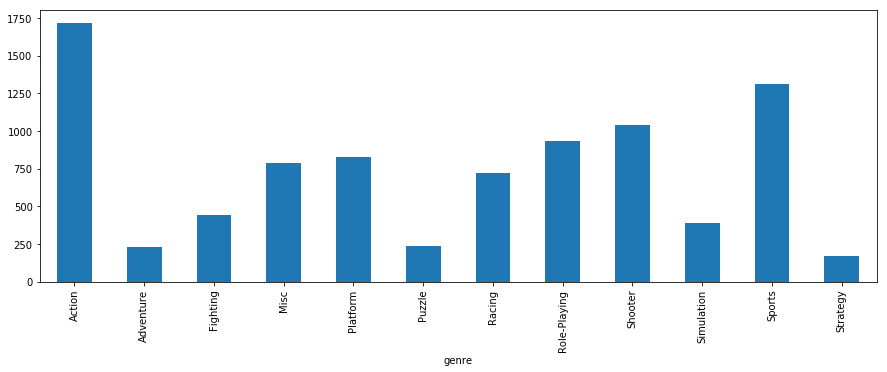

In [107]:
game_genre = game.groupby(['genre'])['total_value'].sum()
game_genre.plot(y='genre', kind='bar', figsize=(15, 5))

<font color='green'>**Наибольший доход принесли игры в жанре Action, Sports, Shooter, Role-Playing, Platform по убыванию.**</font>

### 2.3.График общих продаж по каждой платформе: <a id='102103'></a>

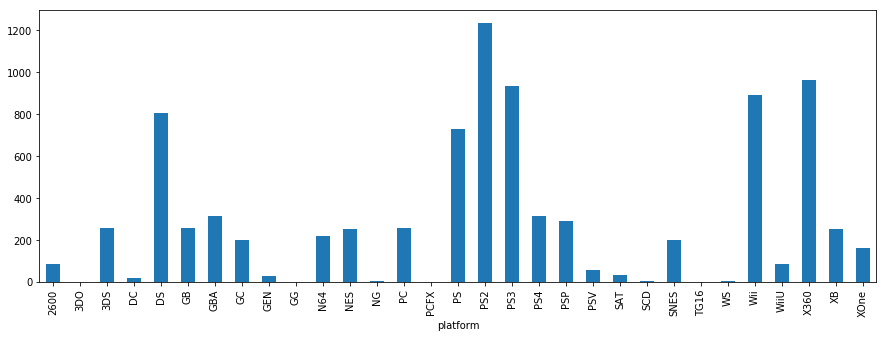

In [108]:
game_platform = game.groupby(['platform'])['total_value'].sum()
game_platform.plot(y='platform', kind='bar', figsize=(15, 5))

<font color='green'>**Наибольшую прибыль принесли игры на платформах PS2, X360, Wii, PS3, DS, PS.**</font>

### 2.4. Графики количества выпущенных игр с отзывами и без. <a id='102104'></a>

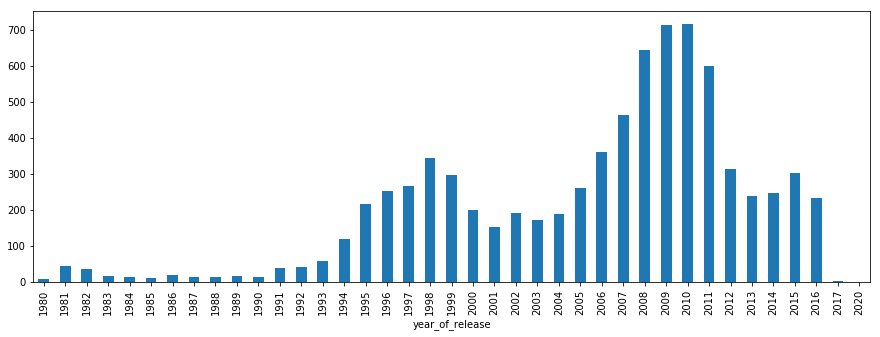

In [109]:
sel_review_null = game.query('critic_score == 0 and user_score == -1')
s1 = sel_review_null.groupby(['year_of_release'])['name'].count()
s1.plot(y='year_of_release', kind='bar', figsize=(15, 5))

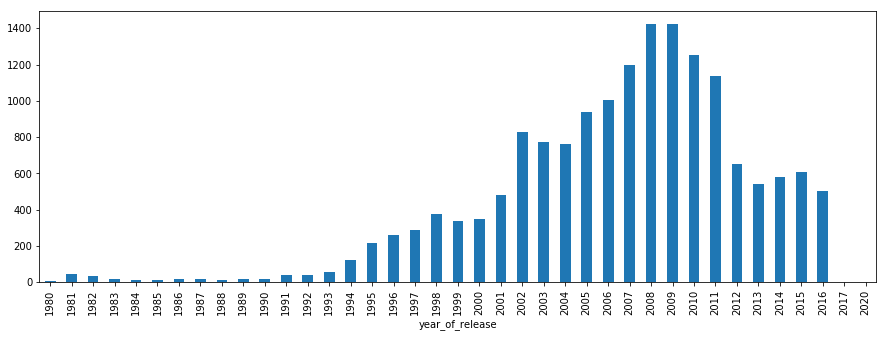

In [110]:
sel_rewiew = game.query('user_score != -1')
sel_review = game[(game['critic_score'] != 0) | (game['user_score'] != 0)]
s2 = sel_review.groupby(['year_of_release'])['name'].count()
s2.plot(y='year_of_release', kind='bar', figsize=(15, 5))

<font color='green'>**Заметно, что отзывы в том или ином виде, начали появляться только в 1985 году, а развитие началось начиная с 2000 года и достигло пика в 2008, тогда же, когда и пиковые продажи.**</font>

### 2.5. Построим boxplot по глобальным продажам: <a id='102105'></a>

In [111]:
game.describe()

,year_of_release,na_players,eu_players,ru_players,other_players,critic_score,user_score,total_value
count,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000
mean,2006.488416,0.263952,0.145909,0.078485,0.047585,33.477288,2.686306,0.535931
std,5.877681,0.818335,0.506705,0.311091,0.188000,35.818116,4.169844,1.558736
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Очень велико стандартное отклонение в глобальной выручке в 3 раза больше среднего значения, медиана меньше среднего в 3 раза.

### 2.6. Медианная цена игр по годам. <a id='102106'></a>

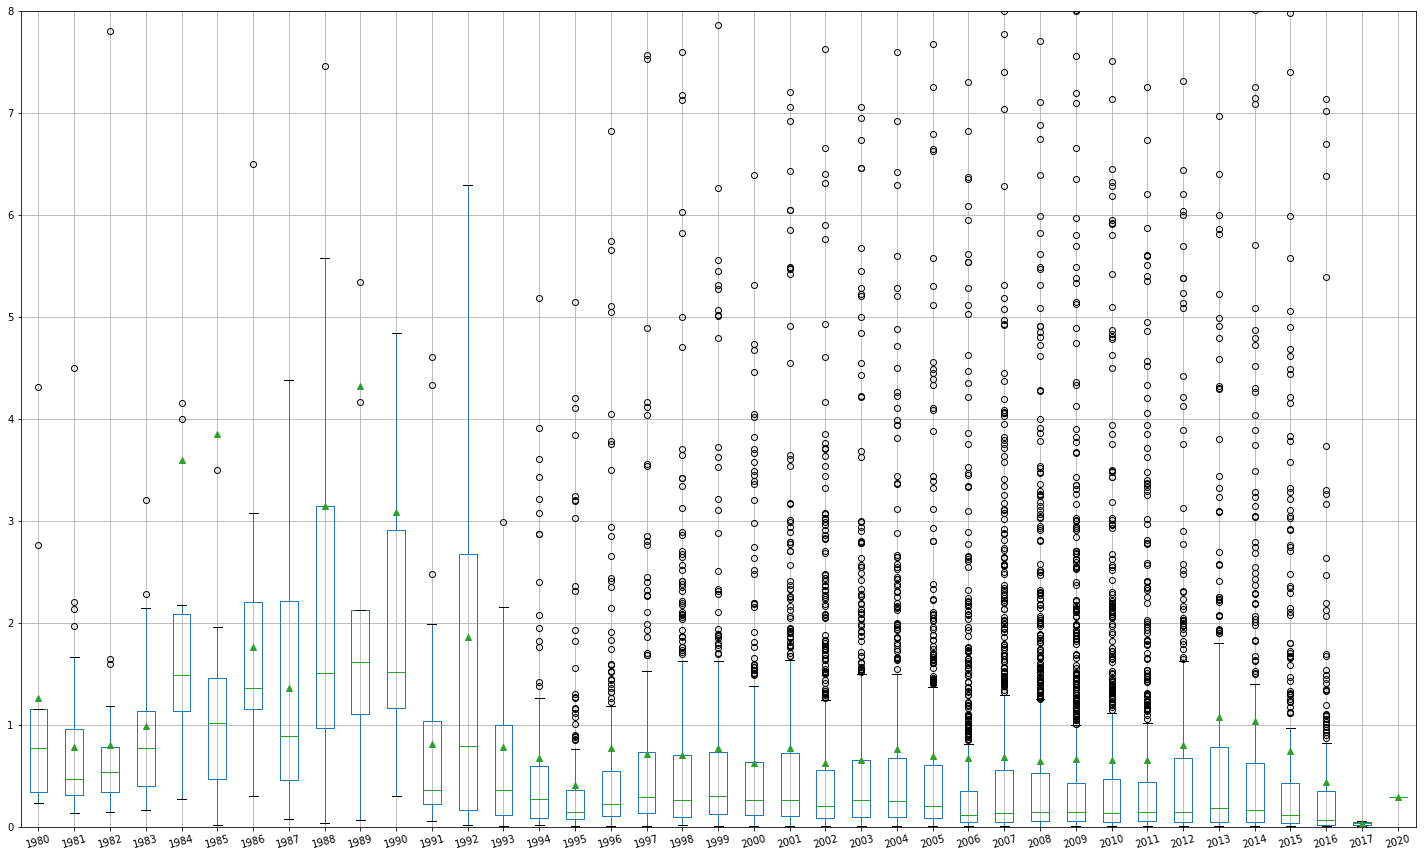

In [112]:
val_years = game.pivot_table(index='name', columns='year_of_release', values='total_value', aggfunc='sum')
plot2 = val_years.boxplot(showmeans=True, rot='15', figsize=(25, 15))
lim = plot2.set_ylim(0, 8)

<font color='green'>**Начиная с 1994 года появляется крайне много выбросов.**</font>

До 1994 года платформ и игр было немного, и медианная цена была довольно велика исключая 1991 и 1993 гг. После 1994 года количество выпускаемых платформ и игр резко выросло, количество пользователей так же выросло, доходы от продажи игр соответственно тоже, но явно видно из графика, что некоторые игры приносили рекордные прибыли. Медианная цена оставалась рекордно низкой практически все годы начиная с 94-го, но можно выделить пики продаж по boxplot в 1998 и 1999, в 2001, в 2012 и особенно в 2013. И резкое снижение в 2017, возможно далее просто нет данных.

### 2.7. Медианная цена игр по годам с группировкой по жанрам. <a id='102107'></a>

Если сделать группировку по жанрам, то видна более общая картина глобальной прибыли. Здесь картина похожа на гистограммы с пиком продаж в 2008 г.

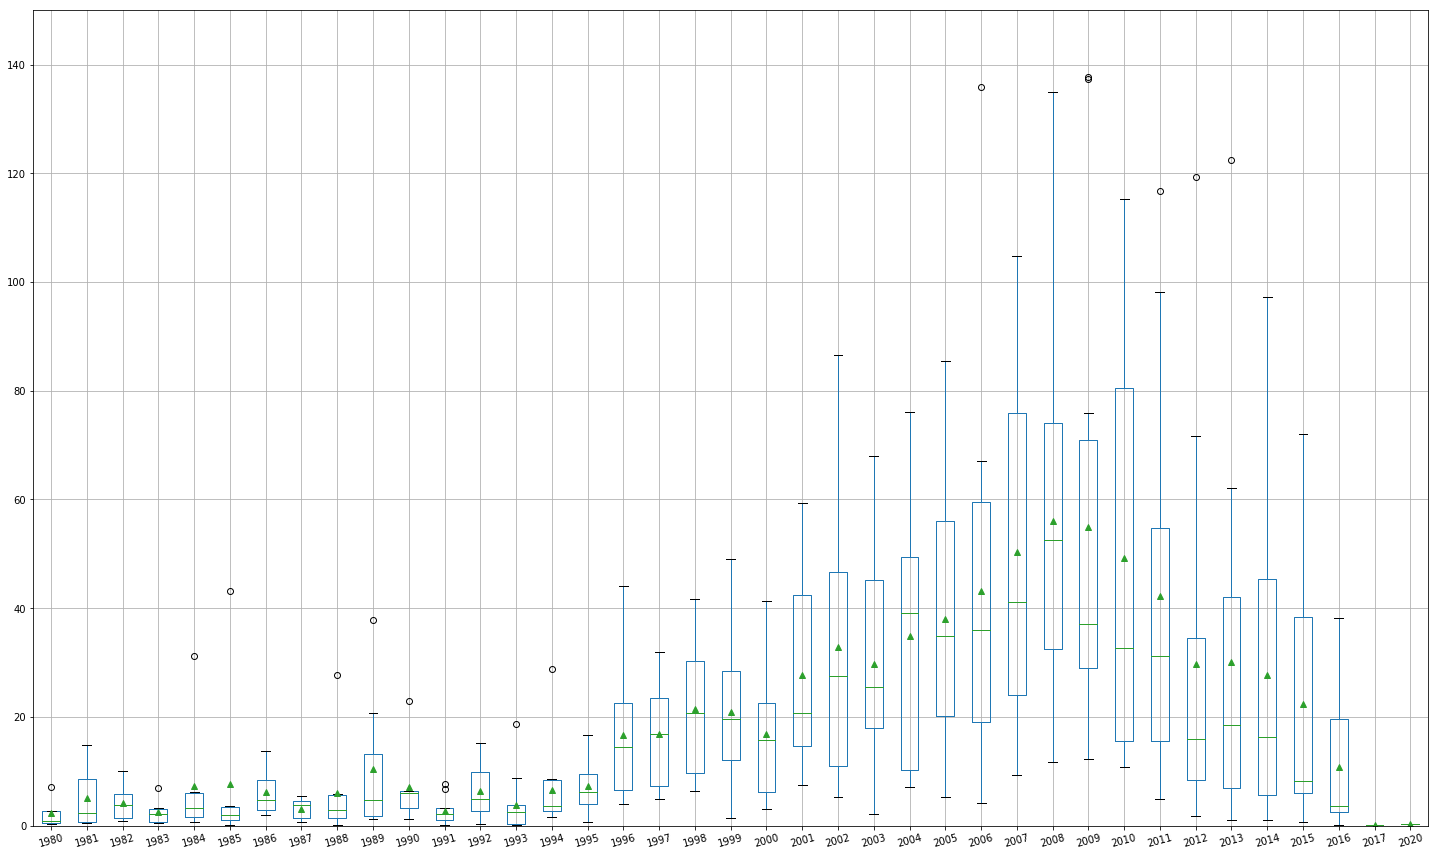

In [113]:
val_y = game.pivot_table(index='genre', columns='year_of_release', values='total_value', aggfunc='sum')
plot5 = val_y.boxplot(showmeans=True, rot='15', figsize=(25, 15))
lim = plot5.set_ylim(0, 150)

### 2.8. Посмотрим на характеристики если сделать срез, в зависимости от компании выпускающей ту или иную платформу: <a id='102108'></a>

In [114]:
sony = game.query('platform == ("PS3", "PS2", "PS4", "PS", "PSP", "PSV")')
#sony

In [115]:
microsoft = game.query('platform == ("X360", "XB", "XOne")')

In [116]:
nintendo = game.query('platform == ("Wii", "DS", "SNES", "GBA", "3DS", "N64", "WiiU", "GC", "DC")')

In [117]:
sega = game.query('platform ==("NES", "GEN", "SAT", "SCD", "GG")')

*************
Sony

In [118]:
#общая прибыль за все годы:
sony['total_value'].sum()

3550.01

In [119]:
sony.describe()

,year_of_release,na_players,eu_players,ru_players,other_players,critic_score,user_score,total_value
count,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000,6639.000000
mean,2006.626149,0.229892,0.164483,0.070865,0.069482,32.474168,2.794126,0.534721
std,5.663483,0.510872,0.433470,0.210585,0.235863,35.862542,4.220460,1.115795
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.060000
50%,2007.000000,0.070000,0.030000,0.000000,0.020000,0.000000,-1.000000,0.190000
75%,2011.000000,0.220000,0.150000,0.060000,0.060000,70.000000,7.400000,0.530000
max,2017.000000,9.430000,9.090000,4.870000,10.570000,98.000000,9.700000,21.050000


Общая выручка за игры на платформах Sony начиная с 1994 г. - 3,5 млрд долл., максимальная в 2017 г. - 21 млн долл., наибольшая выручка за игры была в Северной Америке (42%) и в Европе (30%), игры на этих платформах получали максимальные оценки, как от критиков, так и от пользователей.

*******************
Microsoft

In [120]:
microsoft['total_value'].sum()

1370.88

In [121]:
microsoft.describe()

,year_of_release,na_players,eu_players,ru_players,other_players,critic_score,user_score,total_value
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,2008.233669,0.381377,0.166344,0.006138,0.047142,53.955283,4.912100,0.601000
std,4.220379,0.838778,0.387340,0.020145,0.114178,31.737696,3.702867,1.304956
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.010000
25%,2005.000000,0.060000,0.010000,0.000000,0.000000,38.000000,-1.000000,0.090000
50%,2008.000000,0.140000,0.040000,0.000000,0.010000,66.000000,6.600000,0.220000
75%,2011.000000,0.370000,0.150000,0.000000,0.040000,78.000000,7.800000,0.580000
max,2016.000000,15.000000,5.140000,0.240000,1.690000,98.000000,9.300000,21.820000


Общая выручка за игры на платформах Microsoft начиная с 2000 г. - 1,37 млрд долл., максимальная в 2016 г. - 21,8 млн долл., так же нужно отметить, что основная прибыль получена от игроков Северной Америки (63,4%) в России же эти платформы практически не присутствовали, игры на этих платформах получали максимальные оценки от критиков, и высокие от пользователей.

**************
Nintendo

In [122]:
nintendo['total_value'].sum()

2977.86

In [123]:
nintendo.describe()

,year_of_release,na_players,eu_players,ru_players,other_players,critic_score,user_score,total_value
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000
mean,2006.661689,0.250511,0.117438,0.096848,0.029290,26.360544,1.632537,0.494087
std,4.714786,0.877690,0.613796,0.373420,0.165252,33.476336,3.907798,1.863228
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.010000
25%,2004.000000,0.010000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.060000
50%,2008.000000,0.080000,0.010000,0.000000,0.010000,0.000000,-1.000000,0.150000
75%,2010.000000,0.230000,0.060000,0.040000,0.020000,63.000000,6.200000,0.390000
max,2020.000000,41.360000,28.960000,6.500000,8.450000,98.000000,9.600000,82.540000


Общая выручка за игры на платформах Nintendo начиная с 1985 г. - 3 млрд долл, максимальная в 2020 г. − 82 млн дол. (похоже на сбой - требует уточнения!!), наибольшая выручка за игры была в Северной Америке (50%), игры на этих платформах получали максимальные оценки, как от критиков, так и от пользователей.

In [124]:
sega['total_value'].sum()

314.89

In [125]:
sega.describe()

,year_of_release,na_players,eu_players,ru_players,other_players,critic_score,user_score,total_value
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.0,305.000000
mean,1992.855738,0.481738,0.090393,0.439574,0.020721,0.0,-1.0,1.032426
std,4.446928,2.401605,0.326792,0.686229,0.106157,0.0,0.0,3.116914
min,1983.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.020000
25%,1990.000000,0.000000,0.000000,0.080000,0.000000,0.0,-1.0,0.090000
50%,1995.000000,0.000000,0.000000,0.200000,0.000000,0.0,-1.0,0.250000
75%,1996.000000,0.180000,0.030000,0.450000,0.010000,0.0,-1.0,1.130000
max,1999.000000,29.080000,3.580000,6.810000,1.510000,0.0,-1.0,40.240000


Общая выручка за игры на платформах Sega начиная с 1983 г. - 317 млн долл., максимальная в 1999 г. − 40 млн долл., наибольшая выручка за игры была в Северной Америке (46%) и в России (42%).

### 2.9. Узнаем на какой платформе было выпущено больше всего игр: <a id='102109'></a>

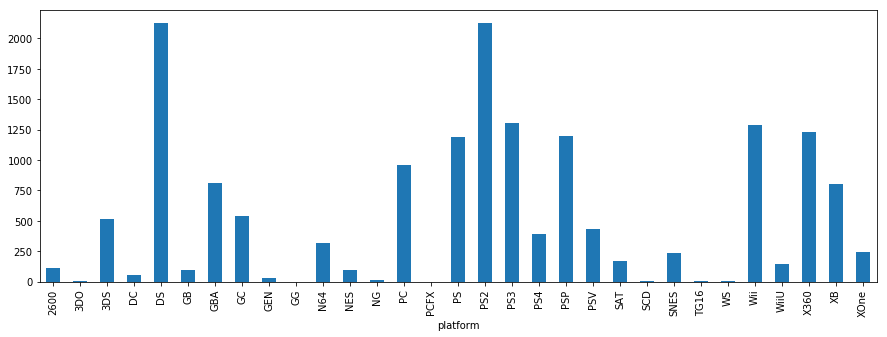

In [126]:
platform = game.groupby(['platform'])['name'].count()
platform.plot(y='platform', kind='bar', figsize=(15, 5))

<font color='green'>**Лидируют Play Station 2 от Sony и DS  от Nintendo.**</font>

### 2.10. Посмотрим игры какого жанра пользуются наибольшей популярностью: <a id='102110'></a>

In [127]:
game['genre'].value_counts(normalize=True)

Action          0.201155
Sports          0.140164
Misc            0.104652
Role-Playing    0.090179
Shooter         0.078808
Adventure       0.078626
Racing          0.074430
Platform        0.053390
Simulation      0.052174
Fighting        0.050897
Strategy        0.040924
Puzzle          0.034600
Name: genre, dtype: float64

Более всего популярен жанр Action (требующий хорошей реакции;) - 20%, следом идут Sports (имитации спортивных игр) - 14%, со смешанным жанром - 10%, ролевые - 9% и т.д. по убыванию.

### 2.11. Посмотрим, на трансформацию популярности того или иного жанра, в зависимости от времени: <a id='102111'></a>

In [128]:
def y_r(year):
    if year <= 1985:
        return '1980 - 1985'
    elif year <= 1990:
        return '1986 - 1990'
    elif year <= 1993:
        return '1991 - 1993'
    elif year <= 2000:
        return '1994 - 2000'
    elif year <= 2006:
        return '2001 - 2006'
    elif year <= 2011:
        return '2007 - 2011'
    return '2012-2020'

game['per'] = game['year_of_release'].apply(y_r)
#game.head(30)

(0, 620)

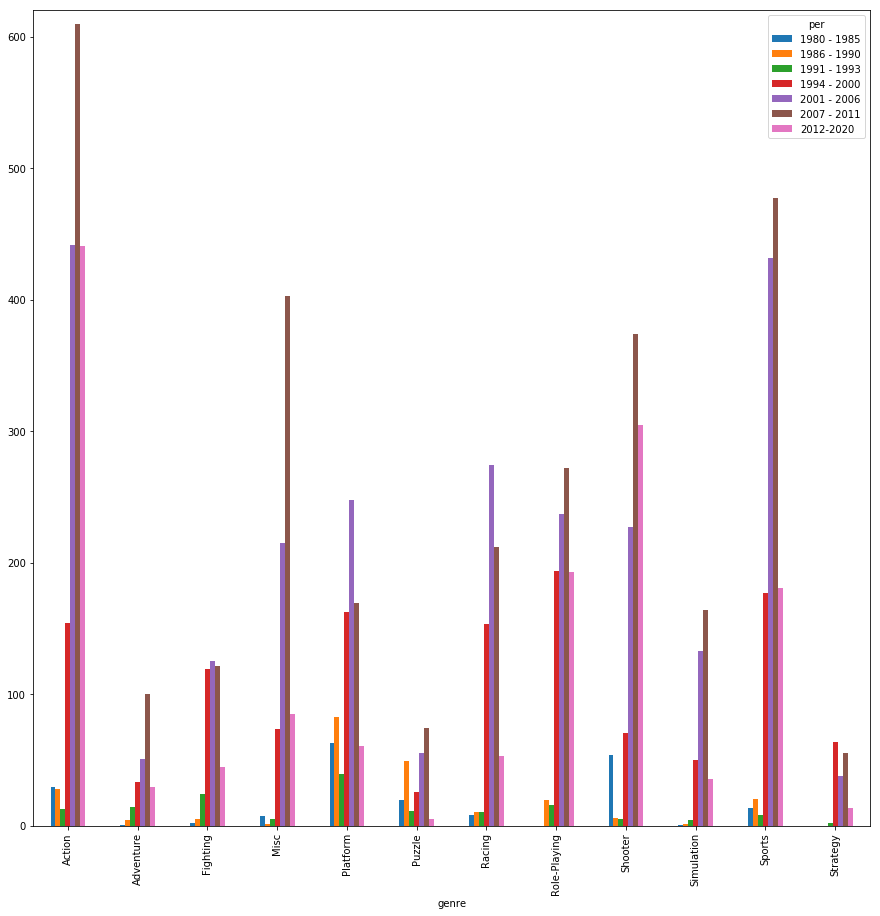

In [129]:
tt = game.pivot_table(index='genre', columns='per', values='total_value', aggfunc='sum')
tt.plot(kind='bar', figsize=(15, 15))
plt.ylim(0, 620)

* В начале становления наиболее популярным был жанр компьютерных игр Platform, в которых основной чертой игрового процесса является прыгание по платформам, лазанье по лестницам, собирание предметов, обычно необходимых для завершения уровня, а так же Shooter - стрелялки. В целом количество  и разнообразие жанров игр было очень небольшим.
* В следующие 5 лет Platform вырос еще больше, а на второе место вышли Puzzle - головоломки, а так же появился новый жанр Role-Playing. А Shooter резко потерял популярность.
* В промежутке (1991-1993) вышло немного игр, но появился жанр стратегии (Strategy), первенство осталось за платформенными играми, но, правда, на второе место вышел жанр Fighting - имитирующий рукопашный бой малого числа персонажей в пределах ограниченного пространства. Произошло становление жанров.
* В семь лет с 1994 по 2000 объем игр вырос примерно в 4 раза, на первое место вышел жанр Role Playing - ролевая игра, где игрок управляет своим персонажем. На втором месте оказались спортивные симуляторы, на третьем платформенные игры на четвертом игры в жанре Action.
* За шесть лет с 2001 по 2006 количество выросло еще в два раза. В эти годы самыми популярными стали игры в жанрах Action и Sports. А с 2007-2009 пик продаж, количество производимых игр увеличилось еще. Первенство жанров не изменилось.
* С 2012 по 2016 начался неуклонный спад, количество производимых игр упало на 50%, по прежнему Action оставался вне конкуренции. На второе место вышли стрелялки.
* За 2017-2020 годы чрезвычайно мало данных по всем столбцам, возможно все игры ушли в облачные пространства вместо привязки к каким-либо носителям.

### 2.12. Найдем игры с максимальной оценкой от пользователей: <a id='102112'></a>

In [130]:
max_user = game.query('user_score > 9')

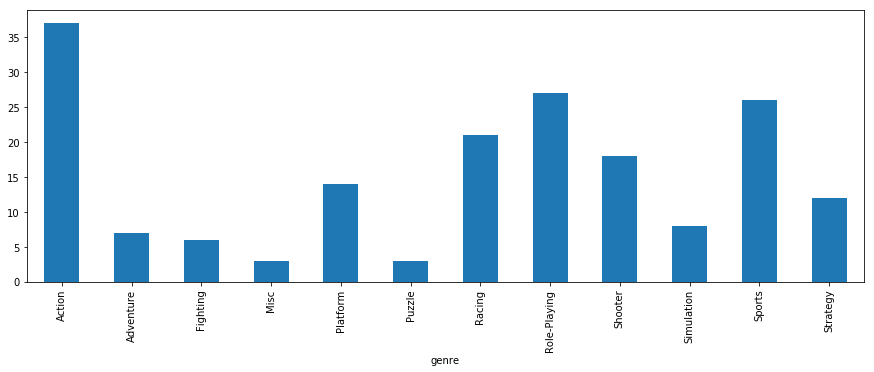

In [131]:
j1 = max_user.groupby(['genre'])['name'].count()
j1.plot(y='genre', kind='bar', figsize=(15, 5))

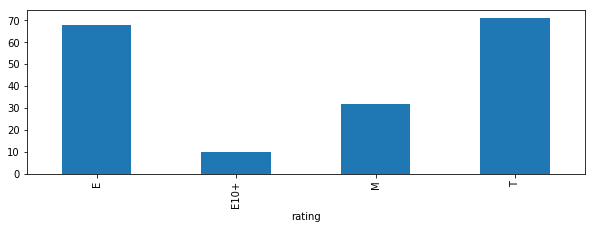

In [132]:
r1 = max_user.groupby(['rating'])['name'].count()
r1.plot(y='rating', kind='bar', figsize=(10, 3))

In [133]:
print('Выручка в Северной Америке:', max_user['na_players'].sum())
print('Выручка в Европе:', max_user['eu_players'].sum())
print('Выручка в России:', max_user['ru_players'].sum())
print('Выручка в других странах:', max_user['other_players'].sum())

Выручка в Северной Америке: 94.62
Выручка в Европе: 48.34
Выручка в России: 30.16
Выручка в других странах: 16.410000000000004


### 2.13. Найдем игры с наибольшей оценкой от критиков: <a id='102113'></a>

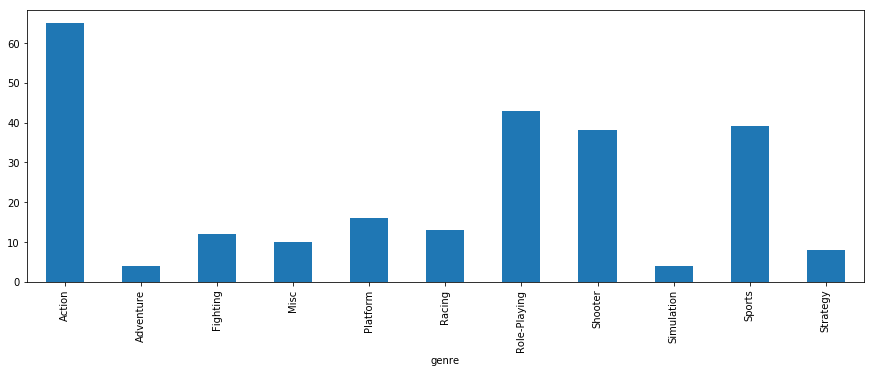

In [134]:
max_critic = game.query('critic_score > 90')
j2 = max_critic.groupby(['genre'])['name'].count()
j2.plot(y='genre', kind='bar', figsize=(15, 5))

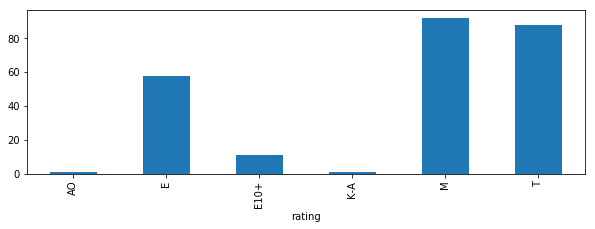

In [135]:
r2 = max_critic.groupby(['rating'])['name'].count()
r2.plot(y='rating', kind='bar', figsize=(10, 3))

In [136]:
print('Выручка в Северной Америке:', max_critic['na_players'].sum())
print('Выручка в Европе:', max_critic['eu_players'].sum())
print('Выручка в России:', max_critic['ru_players'].sum())
print('Выручка в других странах:', max_critic['other_players'].sum())

Выручка в Северной Америке: 420.96999999999997
Выручка в Европе: 243.21999999999997
Выручка в России: 64.46
Выручка в других странах: 90.64000000000001


Прибыль связанная с оценками критиков и пользователей очень сильно отличается, прибыль от игр оцененных критиками высокими оценками в разы выше, чем от игр с высокими оценками пользователей, скорее всего это обратный процесс, и оценка критиков влияет на прибыль. Игры с рейтингом E и Т выше всех оценили пользователи, а игры с рейтингом Т и М - критики.

### 2.14. Найдем игры с минимальной оценкой от пользователей: <a id='102114'></a>

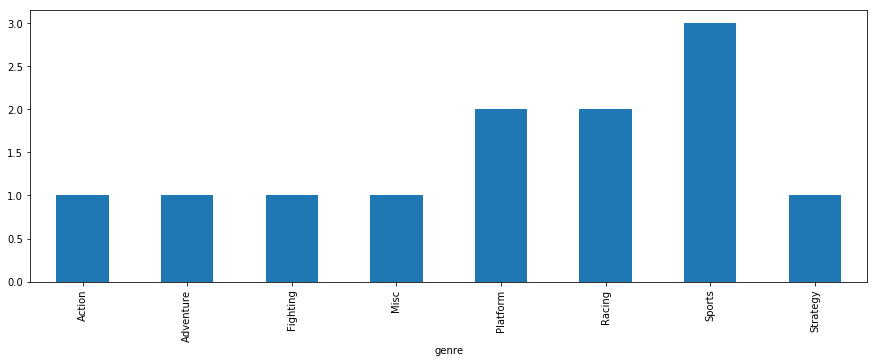

In [137]:
min_user = game.query('user_score < 1 and user_score != 0 and user_score != -1')
j3 = min_user.groupby(['genre'])['name'].count()
j3.plot(y='genre', kind='bar', figsize=(15, 5))

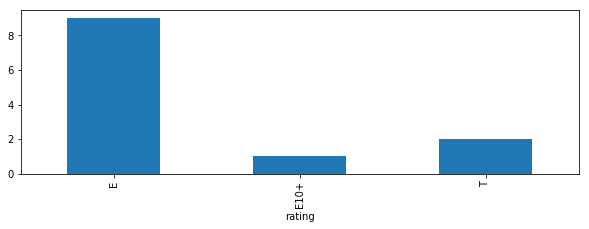

In [138]:
r3 = min_user.groupby(['rating'])['name'].count()
r3.plot(y='rating', kind='bar', figsize=(10, 3))

In [139]:
print('Выручка в Северной Америке:', min_user['na_players'].sum())
print('Выручка в Европе:', min_user['eu_players'].sum())
print('Выручка в России:', min_user['ru_players'].sum())
print('Выручка в других странах:', min_user['other_players'].sum())

Выручка в Северной Америке: 1.07
Выручка в Европе: 0.07
Выручка в России: 0.0
Выручка в других странах: 0.08999999999999998


### 2.15. Найдем игры с наименьшей оценкой от критиков: <a id='102115'></a>

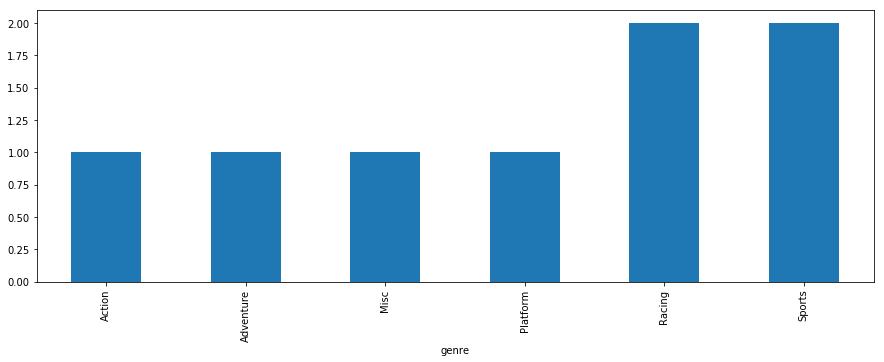

In [140]:
min_critic = game.query('critic_score < 20 and critic_score != 0')
j5 = min_critic.groupby(['genre'])['name'].count()
j5.plot(y='genre', kind='bar', figsize=(15, 5))

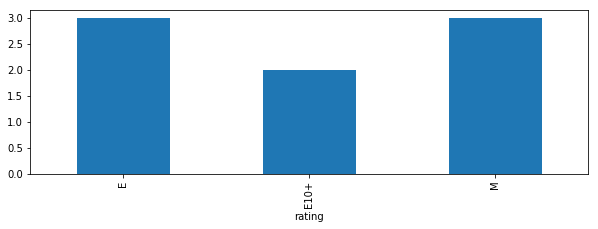

In [141]:
r4 = min_critic.groupby(['rating'])['name'].count()
r4.plot(y='rating', kind='bar', figsize=(10, 3))

In [142]:
print('Выручка в Северной Америке:', min_critic['na_players'].sum())
print('Выручка в Европе:', min_critic['eu_players'].sum())
print('Выручка в России:', min_critic['ru_players'].sum())
print('Выручка в других странах:', min_critic['other_players'].sum())

Выручка в Северной Америке: 0.53
Выручка в Европе: 0.16
Выручка в России: 0.0
Выручка в других странах: 0.07


Снова подтвердилась связь прибыли и оценок, по крайней мере плохих, здесь разногласий между пользователями и критиками пракически нет, все игры с очень низкими оценками получили минимальную прибыль. Игры с рейтингом E ниже всех оценили пользователи, а игры с рейтингом Е и М - критики. Наименее оцененными оказались игры в жанрах Racing и Sports.

### 2.16. Узнаем есть ли корреляция между оценками пользователей и критиков: <a id='102116'></a>

In [143]:
game.corr()[['user_score', 'critic_score']]

,user_score,critic_score
year_of_release,0.148209,0.113371
na_players,0.138297,0.153429
eu_players,0.152019,0.170755
ru_players,-0.034435,-0.042874
other_players,0.164581,0.176135
critic_score,0.819378,1.000000
user_score,1.000000,0.819378
total_value,0.135001,0.148745


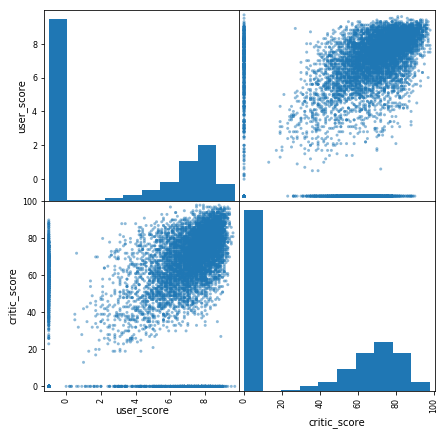

In [144]:
plot4 = pd.plotting.scatter_matrix(game[['user_score', 'critic_score']], figsize=(7, 7))

Из графика видна прямая сильная корреляция (0,8) между оценками пользователей и оценками критиков, причем чем оценка выше тем больше сходятся мнения.

### 3. Портрет пользователя для каждого региона. <a id='10103'></a>

In [145]:
#сделаем срезы по регионам:
na = game.query('na_players > 0')
eu = game.query('eu_players > 0')
ru = game.query('ru_players > 0')
oth = game.query('other_players > 0')

### 3.1. ТОП-5 жанров для каждого региона. <a id='103100'></a>

In [146]:
na['genre'].value_counts(normalize=True).head()

Action     0.213506
Sports     0.152230
Misc       0.099958
Shooter    0.094956
Racing     0.090704
Name: genre, dtype: float64

* В Северной Америке наиболее популярен жанр Action - 21,3%, Sports - 15,2%, следом Misc, Shooter и Racing - 9,9%, 9,4%, 9% соответственно.

In [147]:
eu['genre'].value_counts(normalize=True).head()

Action     0.225386
Sports     0.143700
Shooter    0.100141
Racing     0.093770
Misc       0.088150
Name: genre, dtype: float64

* В Европе пятерка жанров выглядит так: Action - 22,5%, Sports - 14,4%, Shooter - 10%, Racing - 9.3%, Misc 8.8%.

In [148]:
ru['genre'].value_counts(normalize=True).head()

Action          0.193134
Role-Playing    0.170843
Adventure       0.122193
Sports          0.096648
Misc            0.086886
Name: genre, dtype: float64

* В России наиболее популярны: Action - 19,3%, Role_Playing - 17%, Adventure - 12,2%, Sports - 9,6%, Misc - 8,6%. Довольно сильные отличия от остальных регионов, придется это учесть при создании игры.

In [149]:
oth['genre'].value_counts(normalize=True).head()

Action     0.213647
Sports     0.155864
Misc       0.100995
Shooter    0.092353
Racing     0.084514
Name: genre, dtype: float64

* В других странах: Action - 21,3%, Sports - 15,5%, Misc 10%, Shooter - 9,2%, Racing - 8.4%.

### 3.2. В какие годы больше всего покупали игры (по регионам).<a id='103101'></a>

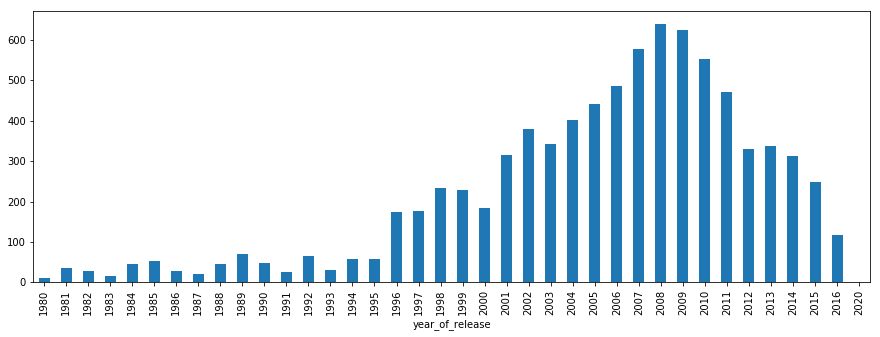

In [150]:
na_total = na.groupby(['year_of_release'])['total_value'].sum()
na_total.plot(y='year_of_release', kind='bar', figsize=(15, 5))

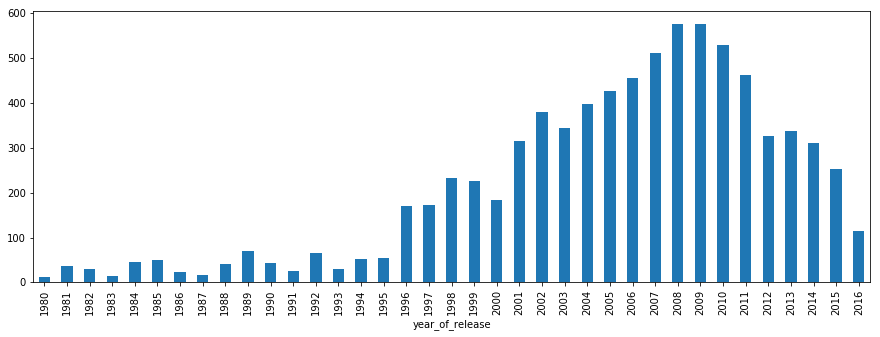

In [151]:
eu_total = eu.groupby(['year_of_release'])['total_value'].sum()
eu_total.plot(y='year_of_release', kind='bar', figsize=(15, 5))

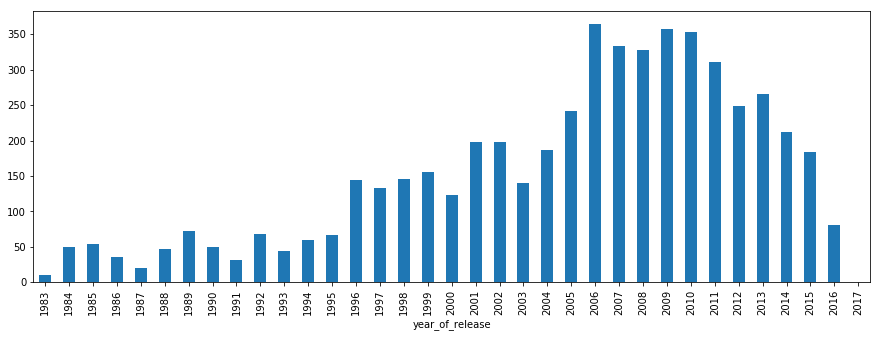

In [152]:
ru_total = ru.groupby(['year_of_release'])['total_value'].sum()
ru_total.plot(y='year_of_release', kind='bar', figsize=(15, 5))

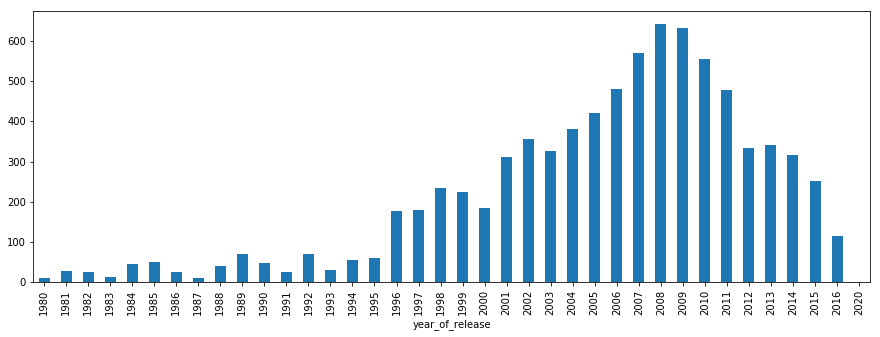

In [153]:
oth_total = oth.groupby(['year_of_release'])['total_value'].sum()
oth_total.plot(y='year_of_release', kind='bar', figsize=(15, 5))

По графикам продаж видно, что во всех регионах, кроме России пик продаж пришелся на 2008 и 2009 годы. В России же это были 2006, 2009, 2010 годы.

### 3.3. ТОП-5 платформ по регионам.<a id='103102'></a>

In [154]:
na['platform'].value_counts(normalize=True).head()

PS2     0.135056
DS      0.125719
X360    0.093289
Wii     0.093039
PS3     0.082701
Name: platform, dtype: float64

* В Северной Америке наиболее популярна Play Station 2 (Sony) - 13,5% конкурируя с DS Nintendo - 12,5%, на 3-м и 4-м местах на равных X-box 360 от Microsoft и Wii от Nintendo по 9,3%, а так же Play Station 3 - 8,2%.

In [155]:
eu['platform'].value_counts(normalize=True).head()

PS2     0.150539
PS      0.091522
X360    0.090960
PS3     0.088525
PC      0.083466
Name: platform, dtype: float64

* В Европейских странах Play Station 2 от Sony (15%) с большим отрывом от других, Play Station (Sony) и X-box (Microsoft) по 9%, PS 3 и PC - 8,8% и 8,3% соответственно.

In [156]:
ru['platform'].value_counts(normalize=True).head()

PS2    0.128051
PSP    0.123332
DS     0.122681
PS3    0.114709
PS     0.065246
Name: platform, dtype: float64

* В России Play Station 2 и PSP от Sony и DS от Nintendo, практически делят первое место - 12,8%, 12,3% и 12,2% соответсвенно, на 4-м месте Play Station 3 -11,4%, на 5-м Play Station 6,5%.

In [157]:
oth['platform'].value_counts(normalize=True).head()

PS2     0.156768
DS      0.112752
X360    0.106220
PS3     0.104010
Wii     0.097779
Name: platform, dtype: float64

* В других странах: PS 2 - 15,6%, DS - 11,2%, X 360 - 10,6%, PS 3 - 10,4%, Ps - 9,7%.

### 3.4. Посмотрим игры с каким рейтингом чаще всего встречаются:<a id='103103'></a>

In [158]:
na['rating'].value_counts(normalize=True).head()

E       0.410570
T       0.288220
M       0.155102
E10+    0.144887
EC      0.000888
Name: rating, dtype: float64

* В Северной Америке чаще всего встречаются игры для всех (41%), для подростков 13-19 лет (28,8%), от 17 лет (15,5%), для всех старше 10 лет - 14,4%, для детей младшего возраста 0,0008%.

In [159]:
eu['rating'].value_counts(normalize=True).head()

E       0.366901
T       0.311606
M       0.186703
E10+    0.133880
K-A     0.000390
Name: rating, dtype: float64

* В Европе чаще всего встречаются игры для всех (36,6%), для подростков 13-19 лет (31%), от 17 лет (18,6%), для всех старше 10 лет - 13,3%, для всех до 1998 - 0,0003%.

In [160]:
ru['rating'].value_counts(normalize=True).head()

T       0.383631
E       0.259717
M       0.248743
E10+    0.107453
K-A     0.000457
Name: rating, dtype: float64

** В России чаще всего встречаются игры для подростков 13-19 лет (38,3%), для всех (26%), от 17 лет (24,8%), для всех старше 10 лет - 10,7%, для всех до 1998 - 0,0004%.

In [161]:
oth['rating'].value_counts(normalize=True).head()

E       0.384139
T       0.290561
M       0.172613
E10+    0.151609
EC      0.000673
Name: rating, dtype: float64

* В других странах чаще всего встречаются игры для всех (38,4%), для подростков 13-19 лет (29%), от 17 лет (17,2%), для всех старше 10 лет - 15,1%, для детей младшего возраста 0,0006%.

**Итак, портрет пользователя:**
* Из Северной Америки - пользователь играет в игры в жанрах - Action, Sports, Misc, Shooter, Racing, с рейтингом - E, T, M, E10+, на платформах - PS2, DS, X360, Wii, PS3.
* Из Европы - пользователь играет в игры в жанрах - Action, Sports, Shooter, Racing, Misc, с рейтингом - E, T, M, E10+, на платформах - PS2, PS, X360, PS3, PC.
* Из России - пользователь играет в игры в жанрах - Action, Role Playing, Adventure, Sports, Misc, с рейтингом - T, E, M, E10+, на платформах - PS2, PSP, DS, PS3, PS.
* Из других стран - пользователь играет в игры в жанрах - Action, Sports, Misc, Shooter, Racing, с рейтингом - E, T, M, E10+, на платформах - PS2, DS, X360, PS3, PS.

### 4. Проверим гипотезы: <a id='10104'></a>

### 4.1. 1 гипотеза.<a id='104100'></a>

* о том, что средний пользовательский рейтинг платформ PS2 и PS3 одинаковый, это будет нулевая гипотеза, т.к. в нулевой мы всегда делаем равенство. Альтернативной будет - гипотеза о том, что их рейтинг различается.

In [162]:
platform_ps2 = game.query('platform == "PS2"')
platform_ps2 = platform_ps2['user_score']
platform_ps3 = game.query('platform == "PS3"')
platform_ps3 = platform_ps3['user_score']
alpha = .05
results = st.ttest_ind(
    platform_ps2,
    platform_ps3)
results.pvalue

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую') 

Не получилось отвергнуть нулевую


### 4.2. 2 гипотеза.<a id='104101'></a>

* средний пользовательский рейтинг жанров Action и Sports различается - это будет альтернативная гипотеза, нулевая, что рейтинги жанров равны (в нулевой признаки равны). При этом исключим рейтинг от пользователей, которому мы присвоили специальную оценку -1.

In [163]:
genre_action = game.query('user_score != -1')
genre_action = game.query('genre == "Action"')
genre_action = genre_action['user_score']
genre_sp = game.query('platform == "Sports"')
genre_sp = genre_sp['user_score']
alpha = .05
results = st.ttest_ind(
    genre_action,
    genre_sp)
results.pvalue

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую') 

Не получилось отвергнуть нулевую


* Из вычислений, с большой вероятностью, можно сделать вывод, что средний пользовательский рейтинг: платформ PS3 и PS2 равны, жанров Action и Sports равны.

### 5. Общие выводы.<a id='10105'></a>

* **Игры в жанре Action популярны во все времена, следовательно лучше всего сделать игру в этом жанре, хоть и есть альтернатива в виде жанра Sports, но его популярность довольно сильно колебалась с годами.** 
* **Рейтинг Е - для всех или (с меньшей долей на рынке) Т - для подростков от 13 до 19 лет (обязательная рекомендация для рынка России).**
* **На платформе PS2 с возможностью использования на всех платформах этой серии (PS, PS3, PSP), для охвата большей доли рынка. Рекомендации по выбору платформы могут быть не актуальны, т.к. нет информации за последние годы. Возможно, игры на этих платформах в ближайшее время будут невостребованы.**

Некоторые данные, которые помогут в работе:
* Самое большое количество игр было выпущено с 2006 по 2011 годы.
* Самые популярные платформы для игр: PS2 от Sony и DS от Nintendo.
* Наблюдается выход на рынок с 1980 года и планомерное развитие до 1995 года. Графики произведенных игр и дохода от их продажи, практически идентичны. В 1996 начался период роста продаж достигший своего пика в 2008-2009 годах затем начался спад продаж и провал в 2017, есть данные за 2020, видимо это предпродажи. Обратить внимание, что нет данных за 2018 и 2019 гг. За 2017 практически тоже.
* Наибольший доход за все время принесли игры в жанре Action, Sports, Shooter, Role-Playing, Platform по убыванию. Более всего популярен жанр Action (требующий хорошей реакции;) - 20%, следом идут Sports (имитации спортивных игр) - 14%, со смешанным жанром - 10%, ролевые - 9% и т.д. по убыванию. С большой вероятностью, можно сказать, что средний пользовательский рейтинг жанров Action и Sports равны.
* Наибольшую прибыль принесли игры на платформах PS2, X360, Wii, PS3, DS, PS, а больше всего игр было выпущено на Play Station 2 от Sony и DS от Nintendo, с большой вероятностью, можно сказать, что средний пользовательский рейтинг платформ PS3 и PS2 равны.
* Заметно, что отзывы в том или ином виде, начали появляться только в 1985 году, а развитие началось начиная с 2000 года и достигло пика в 2008, тогда же, когда и пиковые продажи. Наблюдается взаимосвязь данных об отзывах. Как правило если есть данные об отзывах критиков, то есть и отзывы от пользователей. Прибыль связанная с оценками критиков и пользователей очень сильно отличается, прибыль от игр оцененных критиками высокими оценками в разы выше, чем от игр с высокими оценками пользователей, скорее всего это обратный процесс, и оценка критиков влияет на прибыль! Нужно использовать это в работе над игрой. Игры с рейтингом E и Т выше всех оценили пользователи, а игры с рейтингом Т и М - критики. Разногласий между пользователями и критиками насчет плохих игр практически нет, все игры с очень низкими оценками получили минимальную прибыль. Игры с рейтингом E ниже всех оценили пользователи, а игры с рейтингом Е и М - критики. Наименее оцененными оказались игры в жанрах Racing и Sports. Есть прямая сильная корреляция между оценками пользователей и оценками критиков, причем чем оценка выше тем больше сходятся мнения.
* До 1994 года платформ и игр было немного, и медианная цена игры была довольно велика исключая 1991 и 1993 гг. После 1994 года количество выпускаемых платформ и игр резко выросло, количество пользователей так же выросло, доходы от продажи игр соответственно тоже, но явно видно из графика, что некоторые игры приносили рекордные прибыли. Медианная цена оставалась рекордно низкой практически все годы начиная с 94-го, но можно выделить пики продаж по boxplot в 1998 и 1999, в 2001, в 2012 и особенно в 2013. И резкое снижение в 2017, возможно далее просто нет данных.

* Общая выручка за игры на платформах Sony начиная с 1994 г. - 3,5 млрд долл., максимальная в 2017 г. - 21 млн долл., наибольшая выручка за игры была в Северной Америке (42%) и в Европе (30%), игры на этих платформах получали максимальные оценки, как от критиков, так и от пользователей. 
* Общая выручка за игры на платформах Microsoft начиная с 2000 г. - 1,37 млрд долл., максимальная в 2016 г. - 21,8 млн долл., так же нужно отметить, что основная прибыль получена от игроков Северной Америки (63,4%) в России же эти платформы практически не присутствовали, игры на этих платформах получали максимальные оценки от критиков, и высокие от пользователей. 
* Общая выручка за игры на платформах Nintendo начиная с 1985 г. - 2,9 млрд долл, максимальная в 2020 г. − 82 млн дол. (похоже на сбой - требует уточнения!!), наибольшая выручка за игры была в Северной Америке (50%), игры на этих платформах получали максимальные оценки, как от критиков, так и от пользователей. 
* Общая выручка за игры на платформах Sega начиная с 1983 г. - 314 млн долл., максимальная в 1999 г. − 40 млн долл., наибольшая выручка за игры была в Северной Америке (46%) и в России (42%).

В начале становления рынка компьютерных игр наиболее популярным был жанр компьютерных игр Platform, в которых основной чертой игрового процесса является прыгание по платформам, лазанье по лестницам, собирание предметов, обычно необходимых для завершения уровня, а так же Shooter - стрелялки. В целом количество и разнообразие жанров игр было очень небольшим. В следующие 5 лет Platform сохранили своё преимущество, но на второе место вышли Puzzle - головоломки, а так же появился новый жанр Role-Playing. В промежутке (1991-1993) вышло немного игр, но появился жанр стратегии (Strategy), но первенство осталось за платформенными играми, но, правда, на второе место вышел жанр Fighting - имитирующий рукопашный бой малого числа персонажей в пределах ограниченного пространства. Произошло становление жанров. В семь лет с 1994 по 2000 объем игр вырос больше чем в 2 раза, на первое место вышел жанр Role Playing - ролевая игра, где игрок управляет своим персонажем. На втором месте оказались спортивные симуляторы, на третьем платформенные игры на четвертом игры в жанре Action. За шесть лет с 2001 по 2006 количество игр выросло еще в два раза. В эти годы самыми популярными стали игры в жанрах Action и Sports. На годы с 2007 по 2011 пришелся пик продаж, количество производимых игр увеличилось еще на 50%. Первенство жанров не изменилось. С 2012 по 2016 начался неуклонный спад, количество производимых игр упало на 50%, по прежнему Action оставался вне конкуренции. На второе место вышли стрелялки. За 2017-2020 годы чрезвычайно мало данных по всем столбцам, возможно все игры ушли в облачные пространства вместо привязки к каким-либо носителям.

Из исследования по регионам продаж можно сказать следующее: во всех регионах, кроме России пик продаж пришелся на 2008 и 2009 годы. В России же это были 2006, 2009, 2010 годы. 

Портрет пользователя по регионам:

* В Северной Америке - пользователь играет в игры в жанрах - Action, Sports, Misc, Shooter, Racing, с рейтингом - E, T, M, E10+, на платформах - PS2, DS, X360, Wii, PS3.
* В Европе - пользователь играет в игры в жанрах - Action, Sports, Shooter, Racing, Misc, с рейтингом - E, T, M, E10+, на платформах - PS2, PS, X360, PS3, PC.
* В России - пользователь играет в игры в жанрах - Action, Role Playing, Adventure, Sports, Misc, с рейтингом - T, E, M, E10+, на платформах - PS2, PSP, DS, PS3, PS.
* В других странах - пользователь играет в игры в жанрах - Action, Sports, Misc, Shooter, Racing, с рейтингом - E, T, M, E10+, на платформах - PS2, DS, X360, PS3, PS.